<a href="https://colab.research.google.com/github/aslan-wong/Day8/blob/main/data_science_on_autopilot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CODING TASK #1: IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# For Autogluon to work in Google Colab, you need to install ipykernel and restart the notebook
# The IPython kernel is the Python execution backend for Jupyter
!pip install -U ipykernel

In [3]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0"
!pip install autogluon --no-cache-dir

  Using cached setuptools-69.1.0-py3-none-any.whl.metadata (6.1 kB)
Using cached setuptools-69.1.0-py3-none-any.whl (819 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 60.2.0
    Uninstalling setuptools-60.2.0:
      Successfully uninstalled setuptools-60.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
openxlab 0.0.34 requires setuptools~=60.2.0, but you have setuptools 69.1.0 which is incompatible.
torchaudio 2.1.0+cu121 requires torch==2.1.0, but you have torch 2.0.1 which is incompatible.
torchdata 0.7.0 requires torch==2.1.0, but you have torch 2.0.1 which is incompatible.
torchtext 0.16.0 requires torch==2.1.0, but you have torch 2.0.1 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.1/953.1 kB 18.3 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 69.1.0
    Uninstalling setuptools-69.1.0:
      Successfully uninstalled setuptools-69.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cvxpy 1.3.3 requires setuptools>65.5.1, but you have setuptools 60.2.0 which is incompatible.
torchaudio 2.1.0+cu121 requires torch==2.1.0, but you have torch 2.0.1 which is incompatible.
torchdata 0.7.0 requires torch==2.1.0, but you have torch 2.0.1 which is incompatible.
torchtext 0.16.0 requires torch==2.1.0, but you have torch 2.0.1 which is incompatible.


In [6]:
 pip install autogluon autogluon.tabular "mxnet<2.0.0"

In [7]:
# AutoGluon is modularized into sub-modules for: 1. Tabular, 2. text, 3.Images
from autogluon.tabular import TabularDataset, TabularPredictor

In [8]:
insurance_df = pd.read_csv('insurance.csv')

In [9]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**PRACTICE OPPORTUNITY #1 [OPTIONAL]:**
- **How many unique regions do we have in the insurance_df DataFrame?**

In [11]:
insurance_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

# CODING TASK #2: PERFORM EXPLORATORY DATA ANALYSIS

In [12]:
# Explore the first five rows in the DataFrame
insurance_df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [13]:
# Explore the last five rows in the DataFrame
insurance_df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [14]:
# Generate statistical summary
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [15]:
# Obtain dataset information
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [19]:
# Grouping by region to see any relationship between region and charges
# Seems like south east region has the highest charges and body mass index
#df_region = insurance_df.groupby(by='region').mean()
df_region = insurance_df.groupby(by='region').mean(numeric_only=True)
df_region

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


**PRACTICE OPPORTUNITY #2 [OPTIONAL]:**
- **Group data by 'age' and examine the relationship between 'age' and 'charges'**

In [22]:
age_df = insurance_df.groupby(by='age').mean(numeric_only=True)
age_df

,bmi,children,charges
age,,,
18,31.326159,0.449275,7086.217556
19,28.596912,0.426471,9747.909335
20,30.632759,0.862069,10159.697736
21,28.185714,0.785714,4730.464330
22,31.087679,0.714286,10012.932802
23,31.454464,1.000000,12419.820040
24,29.142679,0.464286,10648.015962
25,29.693929,1.285714,9838.365311
26,29.428929,1.071429,6133.825309


# CODING TASK #3: PERFORM DATA VISUALIZATION

<Axes: >

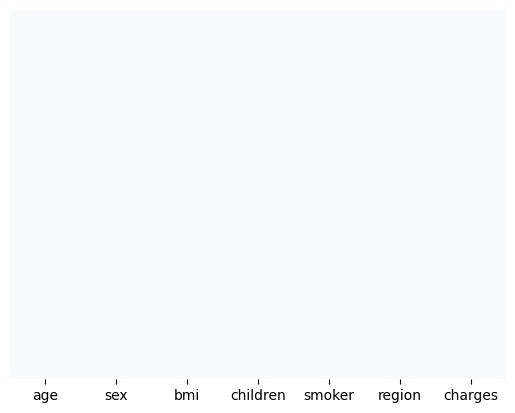

In [23]:
# check if there are any Null values
sns.heatmap(insurance_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [24]:
# check if there are any Null values
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

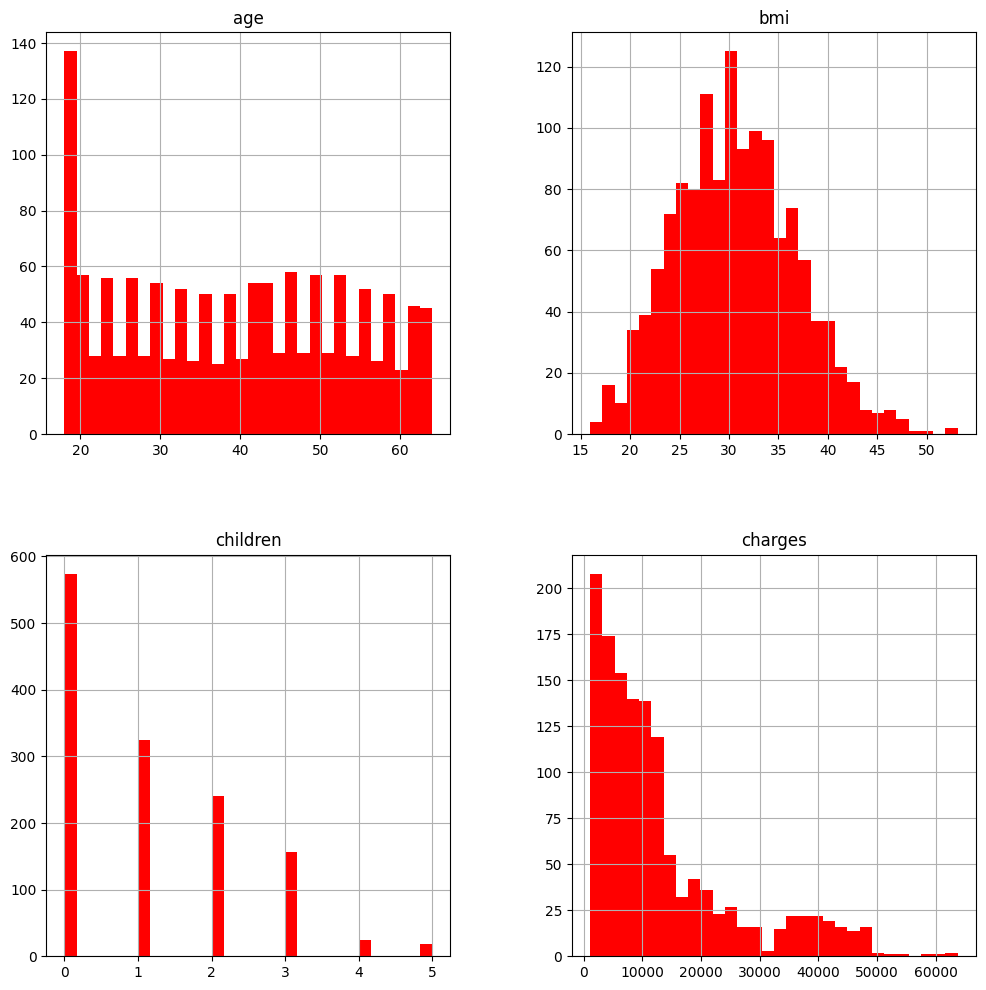

In [25]:
insurance_df[['age', 'sex', 'bmi', 'children', 'smoker', 'charges']].hist(bins = 30, figsize = (12, 12), color = 'r');


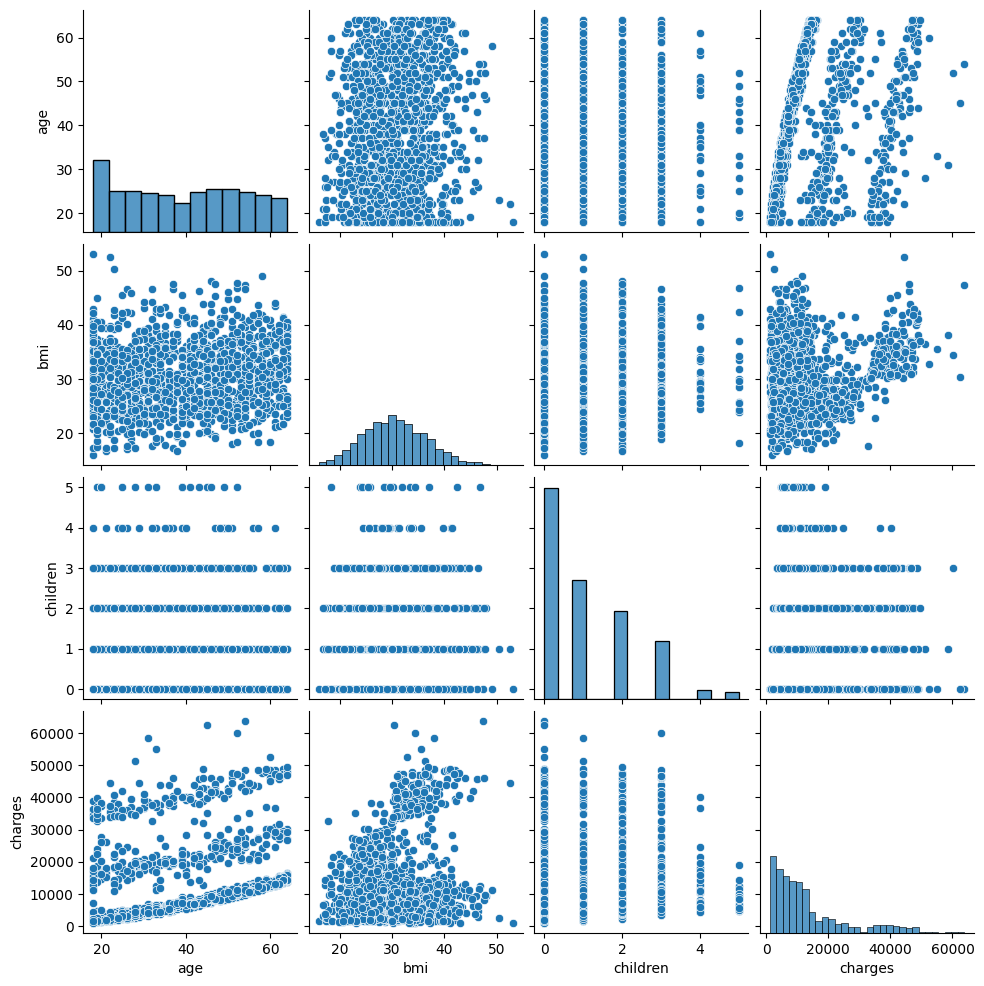

In [26]:
# plot pairplot
sns.pairplot(insurance_df)

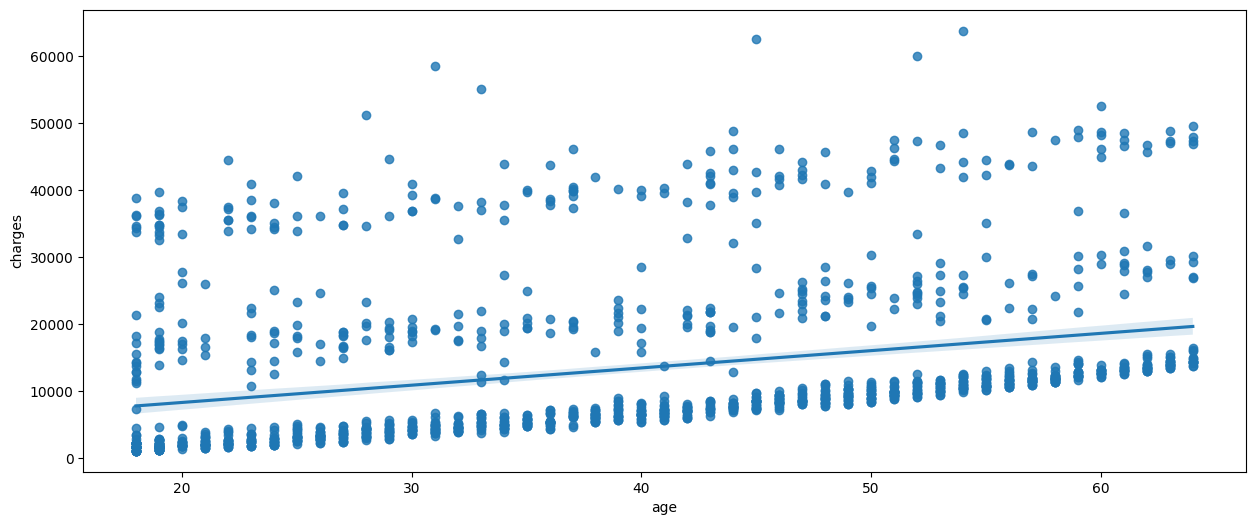

In [27]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'age', y = 'charges', data = insurance_df)
plt.show()


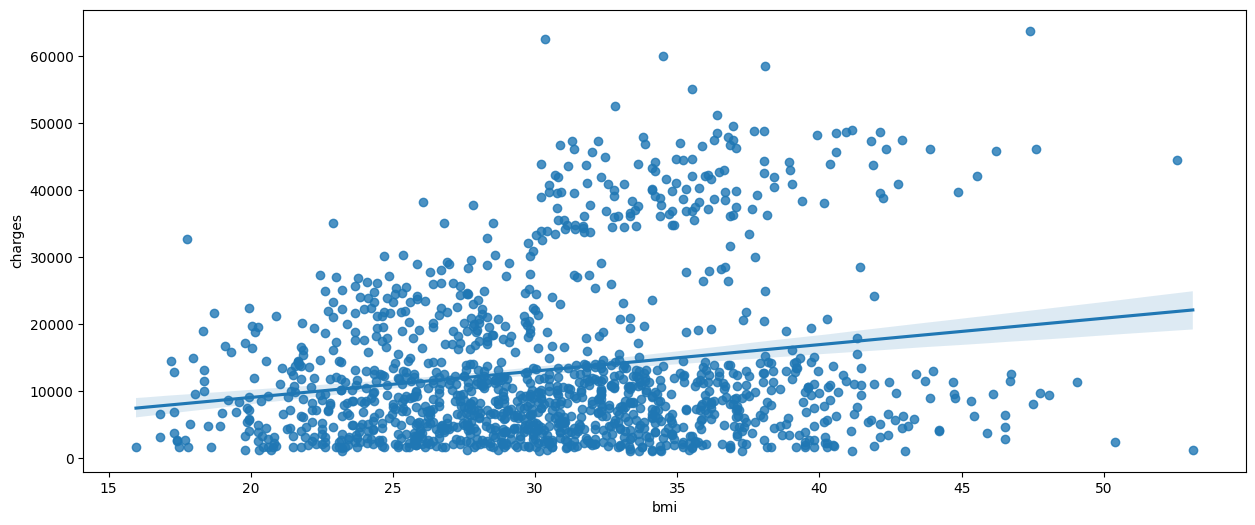

In [28]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'bmi', y = 'charges', data = insurance_df)
plt.show()


**PRACTICE OPPORTUNITY #3 [OPTIONAL]:**
 - **Calculate and plot the correlation matrix**
 - **Which feature has the most positive correlation with charges?**

In [38]:
corr = insurance_df[['age','bmi', 'children' ,'charges']].corr()

In [33]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: >

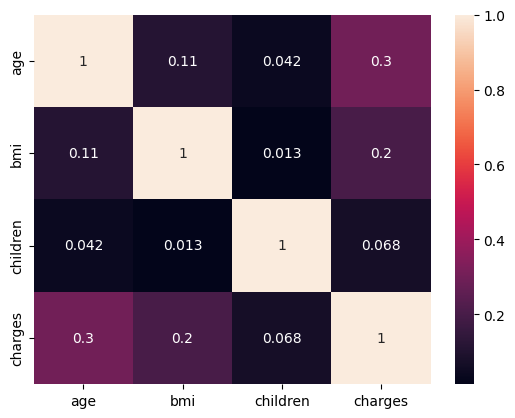

In [39]:
sns.heatmap(corr, annot=True)

# CODING TASK #4: TRAIN MULTIPLE MODELS USING AUTOGLUON

In [47]:
# Split the data into 80% for training and 20% for testing using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(insurance_df, test_size=0.2, random_state=0)

In [48]:
X_train

,age,sex,bmi,children,smoker,region,charges
621,37,male,34.100,4,yes,southwest,40182.24600
194,18,male,34.430,0,no,southeast,1137.46970
240,23,female,36.670,2,yes,northeast,38511.62830
1168,32,male,35.200,2,no,southwest,4670.64000
1192,58,female,32.395,1,no,northeast,13019.16105
...,...,...,...,...,...,...,...
763,27,male,26.030,0,no,northeast,3070.80870
835,42,male,35.970,2,no,southeast,7160.33030
1216,40,male,25.080,0,no,southeast,5415.66120
559,19,male,35.530,0,no,northwest,1646.42970


In [49]:
X_test

,age,sex,bmi,children,smoker,region,charges
578,52,male,30.200,1,no,southwest,9724.53000
610,47,female,29.370,1,no,southeast,8547.69130
569,48,male,40.565,2,yes,northwest,45702.02235
1034,61,male,38.380,0,no,northwest,12950.07120
198,51,female,18.050,0,no,northwest,9644.25250
...,...,...,...,...,...,...,...
1084,62,female,30.495,2,no,northwest,15019.76005
726,41,male,28.405,1,no,northwest,6664.68595
1132,57,male,40.280,0,no,northeast,20709.02034
725,30,female,39.050,3,yes,southeast,40932.42950


In [50]:
# Train multiple ML regression models using AutoGluon
# You need to specify the target column, train_data, limit_time, and presets
# Note that AutoGluon automatically detects if the problem is classification or regression type problems from the 'label' column
# For regression type problems, 'label' values are generally floating point non-integers with large number of unique values

predictor = TabularPredictor(label="charges", problem_type = 'regression', eval_metric = 'r2').fit(train_data = X_train, time_limit = 200, presets = "best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20240223_015915"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 200 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240223_015915/ds_sub_fit/sub_fit_ho.
Beginning AutoGluon training ... Time limit = 50s
AutoGluon will save models to "AutogluonModels/ag-20240223_015915/ds_sub_fit/sub_fit_ho"
=================== System Info ===================
AutoGluon Version:  1.0.

In [51]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model  score_val eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3   0.848502          r2       0.782534  105.623241                0.000880           0.628148            3       True          9
1     WeightedEnsemble_L2   0.847428          r2       0.555320   75.818703                0.001468           0.608896            2       True          7
2         CatBoost_BAG_L1   0.846672          r2       0.032958   22.086980                0.032958          22.086980            1       True          6
3       LightGBMXT_BAG_L2   0.844297          r2       0.781653  104.995094                0.197315          29.768927            2       True          8
4       LightGBMXT_BAG_L1   0.840820          r2       0.247354   25.946812                0.247354          25.946812            1       True          3
5         Ligh

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -0.07448567993942246,
  'KNeighborsDist_BAG_L1': -0.16102308298670942,
  'LightGBMXT_BAG_L1': 0.8408198040276409,
  'LightGBM_BAG_L1': 0.8396145120831351,
  'RandomForestMSE_BAG_L1': 0.8227276280725969,
  'CatBoost_BAG_L1': 0.8466715382588097,
  'WeightedEnsemble_L2': 0.8474281439722828,
  'LightGBMXT_BAG_L2': 0.8442969780386185,
  'WeightedEnsemble_L3': 0.8485017413842517},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'KNeighborsUnif_BAG_L1': ['KNeigh

# CODING TASK #5: EVALUATE TRAINED MODELS PERFORMANCE

In [52]:
predictor.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,0.848502,r2,0.782534,105.623241,0.000880,0.628148,3,True,9
1,WeightedEnsemble_L2,0.847428,r2,0.555320,75.818703,0.001468,0.608896,2,True,7
2,CatBoost_BAG_L1,0.846672,r2,0.032958,22.086980,0.032958,22.086980,1,True,6
3,LightGBMXT_BAG_L2,0.844297,r2,0.781653,104.995094,0.197315,29.768927,2,True,8
4,LightGBMXT_BAG_L1,0.840820,r2,0.247354,25.946812,0.247354,25.946812,1,True,3
5,LightGBM_BAG_L1,0.839615,r2,0.049894,25.627891,0.049894,25.627891,1,True,4
6,RandomForestMSE_BAG_L1,0.822728,r2,0.223647,1.548124,0.223647,1.548124,1,True,5
7,KNeighborsUnif_BAG_L1,-0.074486,r2,0.014103,0.009562,0.014103,0.009562,1,True,1
8,KNeighborsDist_BAG_L1,-0.161023,r2,0.016382,0.006797,0.016382,0.006797,1,True,2


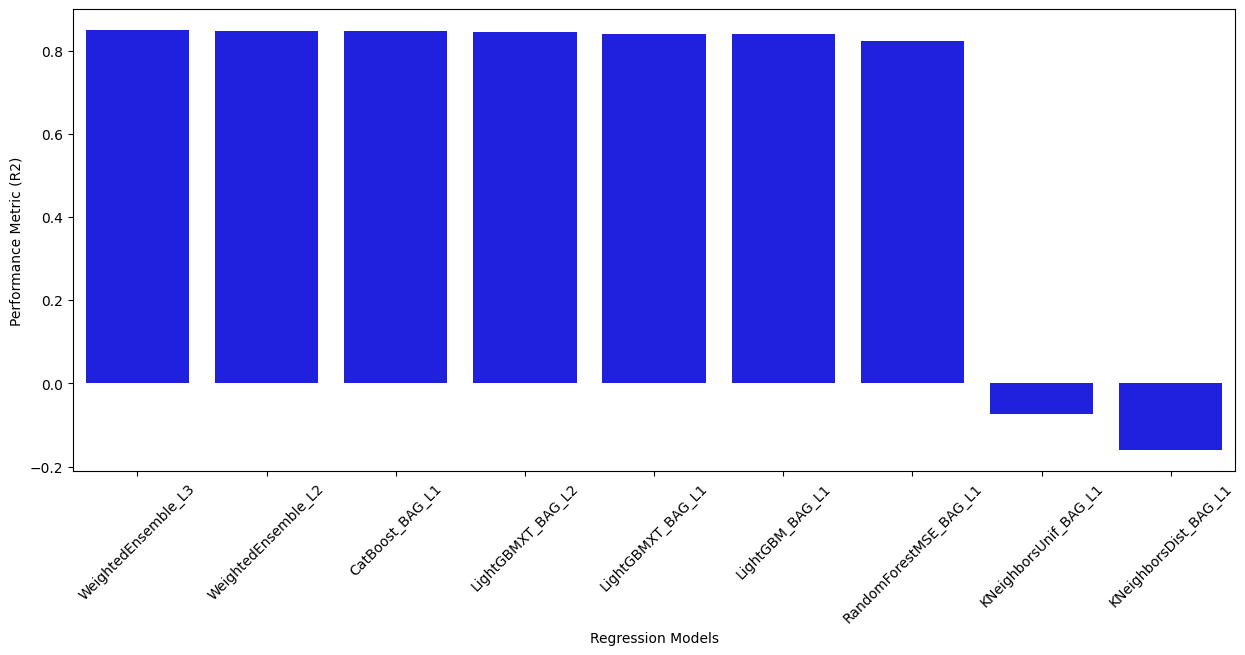

In [53]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "b")
ax.set(ylabel = "Performance Metric (R2)", xlabel = "Regression Models")
plt.xticks(rotation = 45);

In [54]:
predictor.evaluate(X_test)

{'r2': 0.9038516180645002,
 'root_mean_squared_error': -3911.532742382379,
 'mean_squared_error': -15300088.394729417,
 'mean_absolute_error': -2402.458875205865,
 'pearsonr': 0.9515020083419461,
 'median_absolute_error': -1615.7149328125001}

In [55]:
# assess model performance
# Pick 5 test datasets and generate predictions
y_pred = predictor.predict(X_test)
print("Predictions:  ", list(y_pred)[:5])

Predictions:   [11510.81640625, 10271.5888671875, 45196.44921875, 13829.283203125, 10954.8095703125]


In [56]:
X_test

,age,sex,bmi,children,smoker,region,charges
578,52,male,30.200,1,no,southwest,9724.53000
610,47,female,29.370,1,no,southeast,8547.69130
569,48,male,40.565,2,yes,northwest,45702.02235
1034,61,male,38.380,0,no,northwest,12950.07120
198,51,female,18.050,0,no,northwest,9644.25250
...,...,...,...,...,...,...,...
1084,62,female,30.495,2,no,northwest,15019.76005
726,41,male,28.405,1,no,northwest,6664.68595
1132,57,male,40.280,0,no,northeast,20709.02034
725,30,female,39.050,3,yes,southeast,40932.42950


In [66]:
y_test = X_test['charges']
y_test #groundtruth

578      9724.53000
610      8547.69130
569     45702.02235
1034    12950.07120
198      9644.25250
           ...     
1084    15019.76005
726      6664.68595
1132    20709.02034
725     40932.42950
963      9500.57305
Name: charges, Length: 268, dtype: float64

Text(0.5, 0, 'True Values')

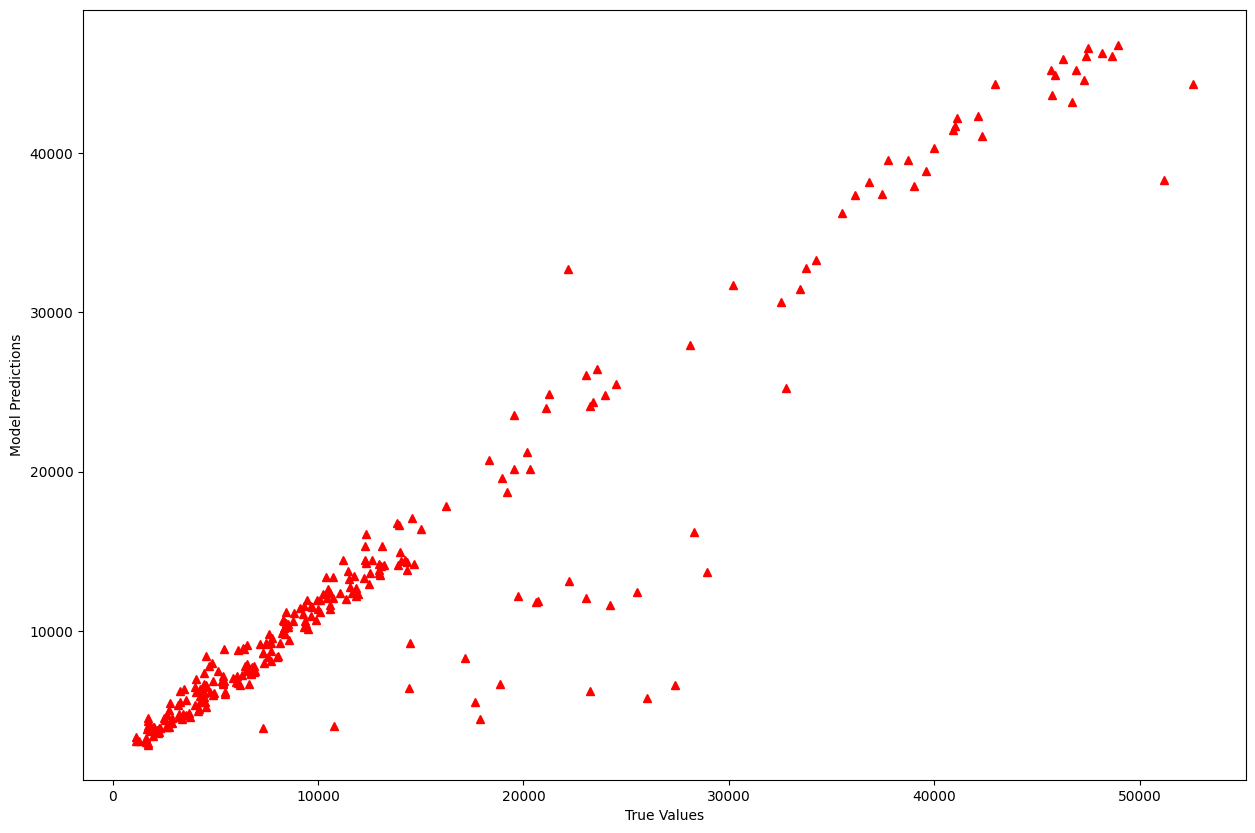

In [68]:
y_predict = predictor.predict(X_test)
plt.figure(figsize = (15, 10))
plt.plot(y_test, y_predict, "^", color = 'r')
plt.ylabel('Model Predictions')
plt.xlabel('True Values')

In [59]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2)

RMSE = 3911.533 
MSE = 15300088.394729417 
MAE = 2402.458875205865 
R2 = 0.9038516180645002


**PRACTICE OPPORTUNITY #4 [OPTIONAL]:**
- **Retrain a regressor model using AutoGluon with different preset value**
- **Set the limit_time to 300 secs**
- **Use RMSE as the key metric and plot the barchart**
- **Which model provides the best performance?**
- **Assess trained model performance by comparing various metrics**

In [78]:
predictor2 = TabularPredictor(label="charges", problem_type = 'regression', eval_metric = 'rmse').fit(train_data = X_train, time_limit = 300, presets = "optimize_for_deployment")

No path specified. Models will be saved in: "AutogluonModels/ag-20240223_023614"
Presets specified: ['optimize_for_deployment']
Beginning AutoGluon training ... Time limit = 300s
AutoGluon will save models to "AutogluonModels/ag-20240223_023614"
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023
CPU Count:          2
Memory Avail:       11.05 GB / 12.67 GB (87.2%)
Disk Space Avail:   76.16 GB / 107.72 GB (70.7%)
Train Data Rows:    1070
Train Data Columns: 6
Label Column:       charges
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11316.60 MB
	Train Data (Original)  Memory Usage: 0.22 MB (0.0% of available memory)
	Inferring data type of each feature based on column value

In [79]:
predictor2.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-4593.375965,root_mean_squared_error,0.033720,10.298844,0.001117,0.293850,2,True,5
1,CatBoost,-4606.663123,root_mean_squared_error,0.003418,0.731417,0.003418,0.731417,1,True,2
2,NeuralNetTorch,-4727.137435,root_mean_squared_error,0.010906,7.409683,0.010906,7.409683,1,True,4
3,LightGBM,-4763.082342,root_mean_squared_error,0.004638,0.480981,0.004638,0.480981,1,True,1
4,NeuralNetFastAI,-4776.217319,root_mean_squared_error,0.013641,1.382913,0.013641,1.382913,1,True,3


In [80]:
predictor2.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model    score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -4593.375965  root_mean_squared_error       0.033720  10.298844                0.001117           0.293850            2       True          5
1             CatBoost -4606.663123  root_mean_squared_error       0.003418   0.731417                0.003418           0.731417            1       True          2
2       NeuralNetTorch -4727.137435  root_mean_squared_error       0.010906   7.409683                0.010906           7.409683            1       True          4
3             LightGBM -4763.082342  root_mean_squared_error       0.004638   0.480981                0.004638           0.480981            1       True          1
4      NeuralNetFastAI -4776.217319  root_mean_squared_error       0.013641   1.382913                0.013641   

{'model_types': {'LightGBM': 'LGBModel',
  'CatBoost': 'CatBoostModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'NeuralNetTorch': 'TabularNeuralNetTorchModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM': -4763.082342479327,
  'CatBoost': -4606.663123404323,
  'NeuralNetFastAI': -4776.217319191077,
  'NeuralNetTorch': -4727.137434925352,
  'WeightedEnsemble_L2': -4593.375965058885},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBM': ['LightGBM'],
  'CatBoost': ['CatBoost'],
  'NeuralNetFastAI': ['NeuralNetFastAI'],
  'NeuralNetTorch': ['NeuralNetTorch'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2']},
 'model_fit_times': {'LightGBM': 0.48098134994506836,
  'CatBoost': 0.7314169406890869,
  'NeuralNetFastAI': 1.3829128742218018,
  'NeuralNetTorch': 7.409682989120483,
  'WeightedEnsemble_L2': 0.2938501834869385},
 'model_pred_times': {'LightGBM': 0.004637718200683594,
  'CatBoost': 0.00341796875,
  'NeuralNetFastAI': 0.01

In [81]:
y_test = X_test['charges']
y_test #groundtruth

578      9724.53000
610      8547.69130
569     45702.02235
1034    12950.07120
198      9644.25250
           ...     
1084    15019.76005
726      6664.68595
1132    20709.02034
725     40932.42950
963      9500.57305
Name: charges, Length: 268, dtype: float64

Text(0.5, 0, 'True Values')

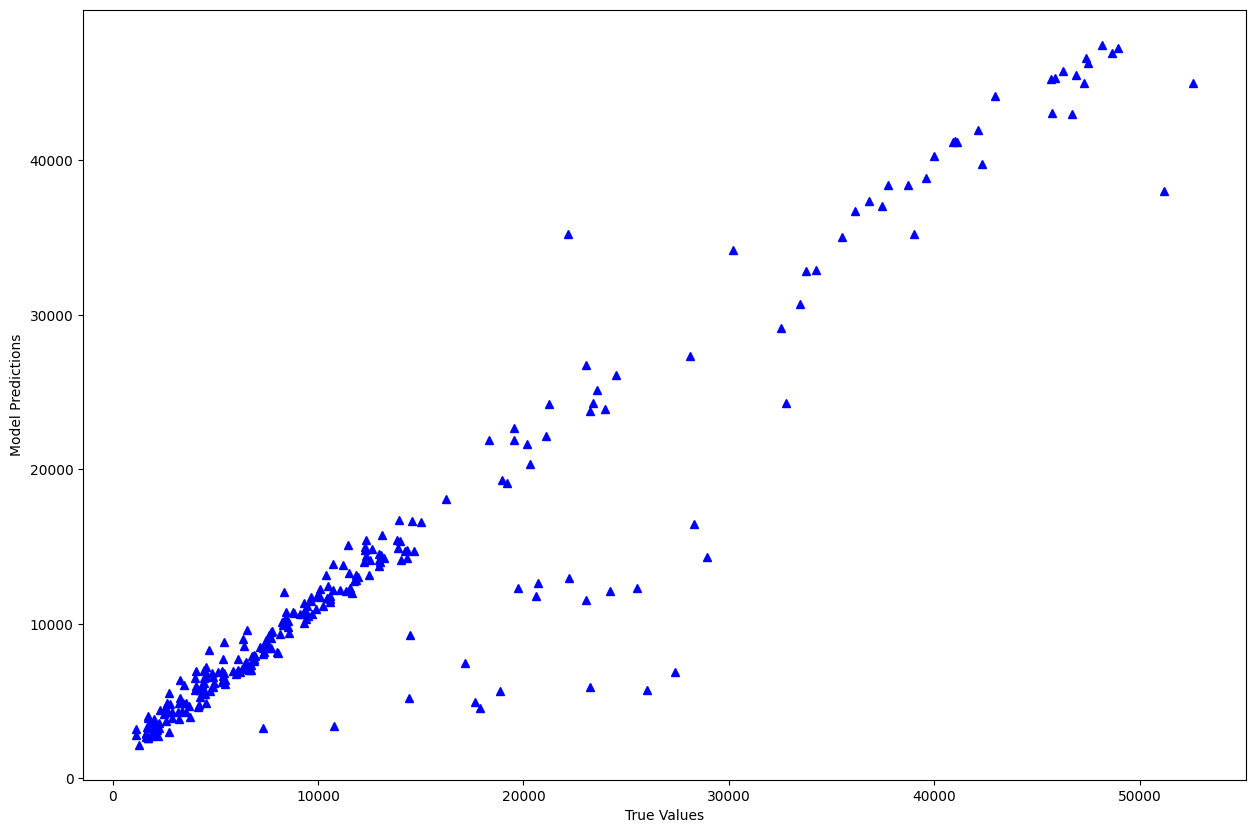

In [82]:
y_predict = predictor2.predict(X_test)
plt.figure(figsize = (15, 10))
plt.plot(y_test, y_predict, "^", color = 'b')
plt.ylabel('Model Predictions')
plt.xlabel('True Values')

{'root_mean_squared_error': -3943.381621474064,
 'mean_squared_error': -15550258.61257942,
 'mean_absolute_error': -2328.651208320079,
 'r2': 0.9022795054704962,
 'pearsonr': 0.9503513814283445,
 'median_absolute_error': -1414.6786857421873}

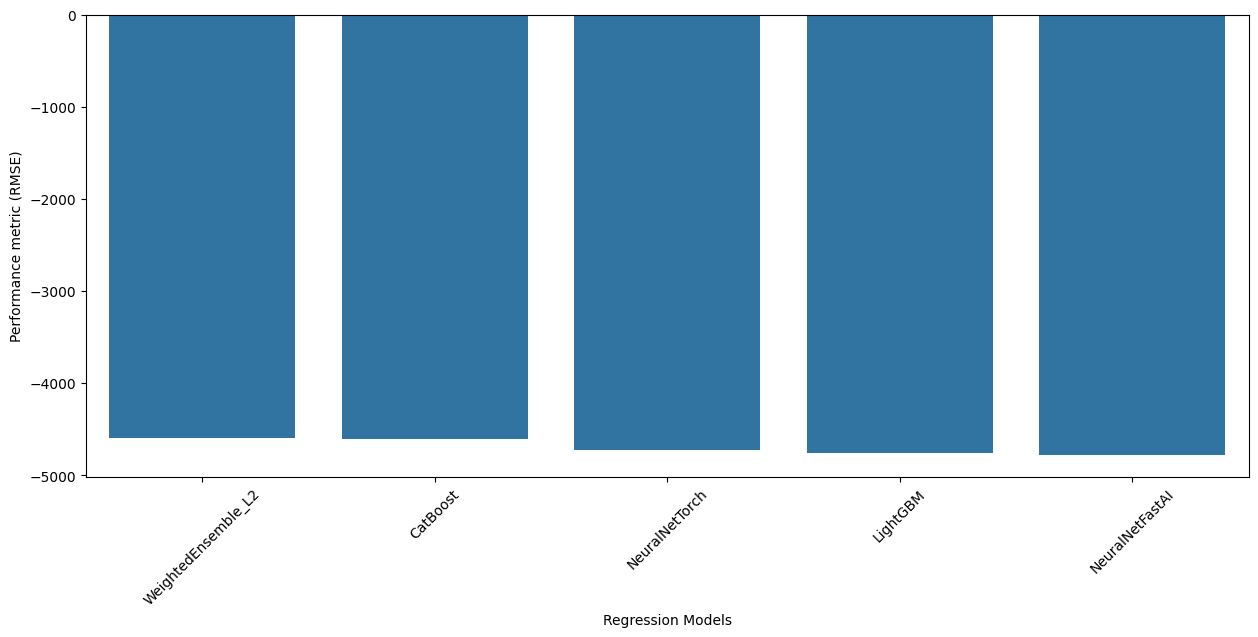

In [83]:
f , ax = plt.subplots(figsize=(15,6))
sns.barplot( x = 'model', y = 'score_val', data = predictor2.leaderboard())
ax.set(ylabel= "Performance metric (RMSE)", xlabel = "Regression Models")
plt.xticks(rotation = 45);

predictor2.evaluate(X_test)

# PRACTICE OPPORTUNITY SOLUTIONS

**PRACTICE OPPORTUNITY #1 SOLUTION:**
- **How many unique regions do we have in the insurance_df?**

In [ ]:
insurance_df['region'].unique()

**PRACTICE OPPORTUNITY #2 SOLUTION:**
- **Group data by 'age' and examine the relationship between 'age' and 'charges'**

In [ ]:
df_age = insurance_df.groupby(by = 'age').mean()
df_age

**PRACTICE OPPORTUNITY #3 SOLUTION:**
 - **Calculate and plot the correlation matrix**
 - **Which feature has the most positive correlation with charges?**

In [31]:
plt.figure(figsize = (15, 10))
sns.heatmap(insurance_df.corr(), annot = True);
# smoker and age have positive correlations with charges

ValueError: could not convert string to float: 'female'

<Figure size 1500x1000 with 0 Axes>

**PRACTICE OPPORTUNITY #4 SOLUTION:**
- **Retrain a regressor model using AutoGluon with different preset value**
- **Set the limit_time to 300 secs**
- **Use RMSE as the key metric and plot the barchart**
- **Which model provides the best performance?**
- **Assess trained model performance by comparing various metrics**

In [ ]:
predictor = TabularPredictor(label="charges", problem_type = 'regression', eval_metric = 'rmse').fit(train_data = X_train, time_limit = 300, presets = "optimize_for_deployment")
predictor.fit_summary()
predictor.leaderboard()

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "b")
ax.set(ylabel = "Performance Metric (RMSE)", xlabel = "Regression Models")
plt.xticks(rotation = 45);

predictor.evaluate(X_test)

# FINAL CAPSTONE PROJECT

- The objective of this project is to build, train, and test a classifier model to predict diabetes in patients using AutoGluon. This project can be effectively used by healthcare professionals to detect diabetes and understand key factors that contribute to the disease.
- Please complete the following tasks:
  - Load the “diabetes.csv” dataset
  - Perform basic Exploratory Data Analysis (EDA)
  - Using ‘best_quality’ preset and ‘accuracy’ metric, train classification models using AutoGluon to predict the “Outcome” column
  - Evaluate trained models' performance by plotting the leaderboard and indicating the best model. Plot the confusion matrix.


# FINAL CAPSTONE PROJECT SOLUTION

# PROJECT TASK #1: IMPORT LIBRARIES AND DATASETS

In [ ]:
# Import Key Libaries and datsets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0"
!pip install autogluon --no-cache-dir

In [ ]:
# pip install autogluon autogluon.tabular "mxnet<2.0.0"

In [ ]:
# AutoGluon is modularized into sub-modules for: 1. Tabular, 2. text, 3.Images
from autogluon.tabular import TabularDataset, TabularPredictor

In [ ]:
# Read Diabetes datsets
diabetes_df = pd.read_csv('diabetes.csv')

In [ ]:
diabetes_df

# PROJECT TASK #2: PERFORM EXPLORATORY DATA ANALYSIS AND VISUALIZATION

In [ ]:
# Explore the first five rows in the DataFrame
diabetes_df.head()

In [ ]:
# Explore the last five rows in the DataFrame
diabetes_df.tail()

In [ ]:
# Generate statistical summary
diabetes_df.describe()

In [ ]:
# Obtain dataset information
diabetes_df.info()

In [ ]:
# check if there are any Null values
sns.heatmap(diabetes_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [ ]:
# check if there are any Null values
diabetes_df.isnull().sum()

In [ ]:
diabetes_df.hist(bins = 30, figsize = (12, 12), color = 'r');

In [ ]:
# plot pairplot
sns.pairplot(diabetes_df, hue = 'Outcome', vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [ ]:
plt.figure(figsize = (15, 10))
sns.heatmap(diabetes_df.corr(), annot = True);
# smoker and age have positive correlations with charges

In [ ]:
plt.figure(figsize = (12, 7))
sns.countplot(x = 'Outcome', data = diabetes_df)

# PROJECT TASK #3: TRAIN MULTIPLE MODELS USING AUTOGLUON

In [ ]:
# Split the data into 80% for training and 20% for testing using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(diabetes_df, test_size=0.2, random_state=0)

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
# Train multiple ML classifier models using AutoGluon
# You need to specify the target column, train_data, limit_time, and presets
# Note that AutoGluon automatically detects if the problem is classification or regression type problems from the 'label' column
predictor = TabularPredictor(label="Outcome", problem_type = 'binary', eval_metric = 'accuracy').fit(train_data = X_train, time_limit = 200, presets = "best_quality")

In [ ]:
predictor.fit_summary()

# PROJECT TASK #4: EVALUATE TRAINED MODEL PERFORMANCE

In [ ]:
predictor.leaderboard()

In [ ]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "b")
ax.set(ylabel = "Performance Metric (Accuracy)", xlabel = "Classification Models")
plt.xticks(rotation = 45);


In [ ]:
predictor.evaluate(X_test)

In [ ]:
# assess model performance
# Pick 5 test datasets and generate predictions
y_pred = predictor.predict(X_test)
print("Predictions:  ", list(y_pred)[:5])

In [ ]:
y_test = X_test['Outcome']
y_test

In [ ]:
# Training set Performance
from sklearn.metrics import confusion_matrix
# Testing Set Performance
plt.figure(figsize = (12, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# GREAT JOB!